<a href="https://colab.research.google.com/github/anumit2004/Supervised-Learning-Models/blob/linear-regression/build_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This is simple custom Ridge Regression algorithm."

## Ridge Regression

**Ridge Regression** is a type of linear regression that includes a regularization term. It is used to prevent overfitting, especially when there is multicollinearity (correlated independent variables) in the data.

The standard linear regression minimizes the **Mean Squared Error (MSE)**. Ridge Regression modifies the cost function by adding a **penalty term** proportional to the square of the magnitude of the coefficients:

$$
J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2
$$

- $\alpha$ is the regularization parameter (also called lambda).
- $\theta_i$ are the model parameters (weights).
- The penalty discourages large values in the weight vector $\theta$, which helps improve model generalization.

### Why Use Ridge Regression?

- Reduces model complexity and multicollinearity.
- Improves predictions on test data (reduces overfitting).
- Suitable when the number of features is large or features are highly correlated.

### Mathematical Solution

The closed-form solution for Ridge Regression is:

$$
\hat{\theta} = \left( X^\top X + \alpha I \right)^{-1} X^\top y
$$

Here:
- \( X \) is the feature matrix,
- \( y \) is the target vector,
- \( I \) is the identity matrix,
- $\alpha$ controls the strength of regularization.


In [ ]:
import numpy as np


In [ ]:
class RidgeRegression():

  def __init__(self,lr=0.01,lamda_val=0.01,iteration=10000):
    self.lr=lr
    self.lamda_val=lamda_val
    self.iteration=iteration
    self.weights=None
    self.bias=None

  def predict(self,x):
    return np.dot(x,self.weights)+self.bias

    #for generating the gradient
  def gradient_descent(self,x,y):
    y_pred=self.predict(x)
    err=y_pred-y
    dw=(1/self.m)*(np.dot(err,x))+(self.lamda_val*self.weights/self.m)
    db=(1/self.m)*np.sum(err)
    return dw,db

  def fit(self,x,y):
    self.m,self.n=x.shape
    self.weights=np.zeros(self.n)
    self.bias=0
    for i in range(self.iteration):
      dw,db=self.gradient_descent(x,y)
      self.weights=self.weights-self.lr*dw
      self.bias=self.bias-self.lr*db
    return self.weights,self.bias


Test the code.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/salary_data.csv')

In [ ]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values

In [ ]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


Bringing the model .

In [ ]:
model=RidgeRegression()
weight_final,bias_final=model.fit(x,y)
print('weight =',weight_final)
print('bias =',bias_final)

weight = [9449.55772645]
bias = 25794.349943570873


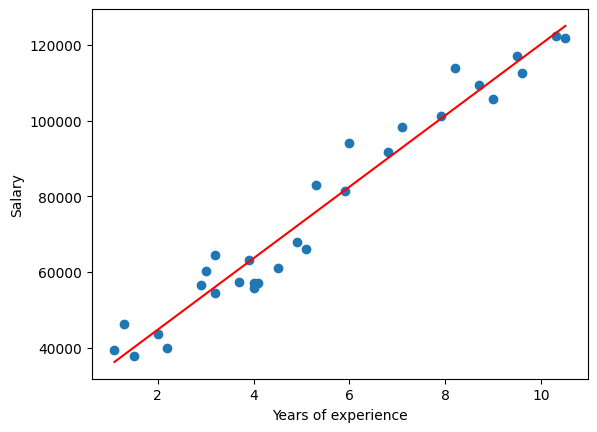

In [ ]:
import matplotlib.pyplot as plt
y_pred=model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()